# Rectangular region

## Plotting Continuum with sub region

(array(235.11475751), array(232.9574565))
25.20000010660482


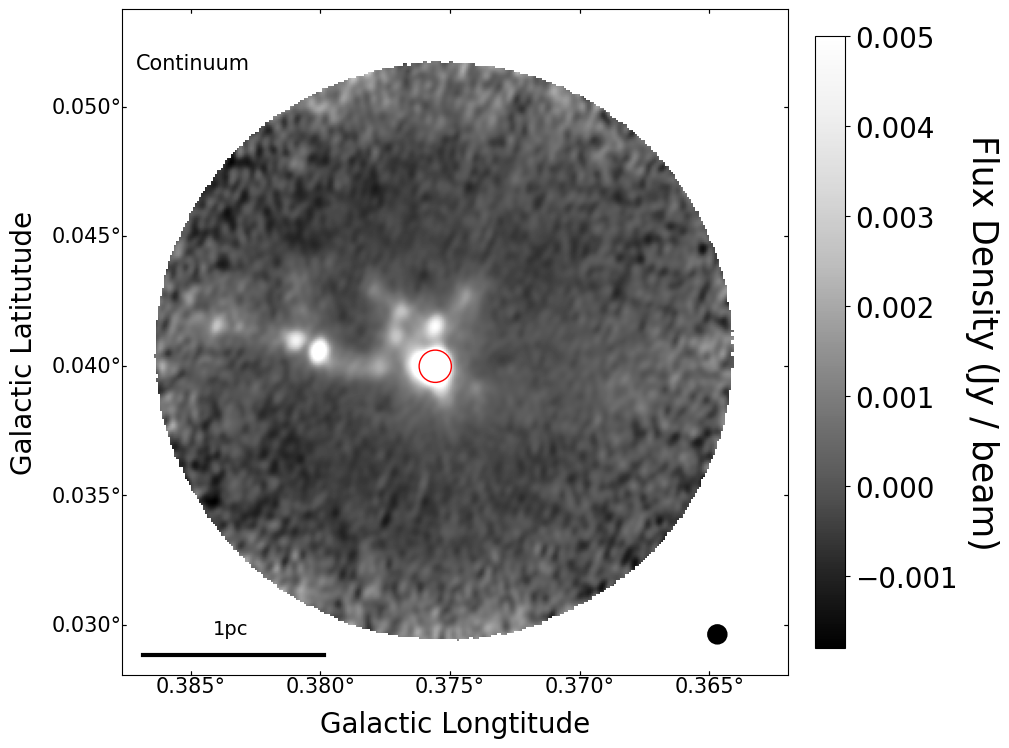

In [20]:
import math
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.coordinates import Galactocentric
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
import reproject
from spectral_cube import SpectralCube   
from reproject.mosaicking import find_optimal_celestial_wcs 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

image_2D = pylab.squeeze(image)

######
wcs_out,shape_out= find_optimal_celestial_wcs([(image_2D,w1)],frame='galactic')     # Use reproject functions
cont,c_footprint = reproject.reproject_interp((image_2D,w1),wcs_out,shape_out=shape_out)      # Rotate image

 
#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=wcs_out)            
lon = ax1.coords[0]
lon.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lat = ax1.coords[1]
lat.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)

plt.xlim(80,410)
plt.ylim(80,410)
im1 = plt.imshow(cont,cmap='Greys_r',vmax=0.005)

#plots the subcube patch
core_coords=w1.pixel_to_world(166,175)
image_coords=core_coords.to_pixel(wcs_out,0,mode="wcs")
print(image_coords)
x=[90,180]
y=[90,90]
plt.plot(np.array([x[0],x[1]]),np.array([y[0],y[1]]),color="black",linewidth=3)
scalebarBegin=w1.pixel_to_world(x[0],y[0])
scalebarEnd=w1.pixel_to_world(x[1],y[1])
sep=scalebarBegin.separation(scalebarEnd)
print(sep.degree*3600)
pylab.text(125,100,'1pc',fontsize=14,color='black')
#pylab.text(40,25,'Smoothed Beam',fontsize=30,color='black')

#This isn't actually the beam!!!! (I think) since its not an ellipse. Fix this plz
ax1.add_patch(matplotlib.patches.Circle((375,100),-1*header['BMAJ']/header['CDELT1']/2.0,fill=True,lw=3,fc='black',ec='black'))  


circle1 = plt.Circle((image_coords[0], image_coords[1]), 8, color='r',fill=False)
plt.gca().add_patch(circle1)

#formats plot
lon.set_ticks(size=-3)                                                                                     
lat.set_ticks(size=-3)                                                                                   
pylab.xlabel('Galactic Longtitude',fontsize=20,labelpad=1)                              
pylab.ylabel('Galactic Latitutude',fontsize=20,labelpad=1)                                  
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                      
plt.annotate('Continuum',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 

#saves fig
pylab.savefig("continuum.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum.png",dpi=250,pad_inches=1)

